# Tasks Description

The goal of this task is to create and analyze a signal with a variable frequency (chirp signal) and calculate its correlation with a reference pulse.

**1.1 Signal Creation and Correlation**:  
First, generate a signal `y` with a sampling frequency of 2000 Hz and a length of 2000 samples.  
Create an empty vector `y` and then create the second signal `yp` as a chirp with a variable frequency, using the `chirp` function. Define `yp` with the initial frequency `f1 = 10 Hz` and final frequency `f2 = 300 Hz`.  
Next, multiply the chirp signal by a Hanning window of the same length. Add the `yp` signal to the signal `y` starting from the 500th sample.

Calculate the correlation between the signal `y` and the signal `yp` using the `correlation` function. Display the resulting correlation signal `yc` and the original signal `y` on a time-domain plot. Convert the `lag` vector to a time vector `tc = lag/fs`.  

After that, compare the results with convolution using the `conv` function. Discuss the differences between the correlation and convolution results.

**1.2 Testing with Various Parameters**:  
Perform the correlation for different combinations of parameters:
- Length of `yp` = 200 samples, starting frequency `f1 = 30 Hz`, and varying final frequencies `f2 = 100 Hz`, `f2 = 200 Hz`, and `f2 = 500 Hz`.
- Length of `yp` = 200 samples, starting and ending frequency `f1 = 500 Hz` and `f2 = 500 Hz`.

Create plots for the correlation of the signal in each of the combinations and discuss the relationship between the time-domain width of the correlation result and the frequency range of the `yp` signal.

**1.4 Signal with Noise**:  
Add white noise with different amplitudes (e.g., `amp = 0.5, 1, 2`) to the signal `y` from the previous step. Perform the correlation of the noisy signal with `yp` and analyze how the correlation result changes with the noise levels. Discuss the visibility of peaks in the correlation signal for different noise levels.


## Task 1.1

### Creating an zeros vector `y` with 2000 samples

In [189]:
import numpy as np

Ns = 2000               # Samples (Length)
fs = 2000               # Sampling frequency
dt = 1 / fs             # Sampling period
t = np.arange(Ns) * dt  # Time vector

y = np.zeros(Ns)        # Zeros vecotr 

### Creating chirp signal

`yp` as a chirp with initial frequency `f1 = 10 Hz` and final frequency `f2 = 300 Hz`.

In [190]:
from scipy.signal import chirp

Ns_p = 200                            # Samples (Length)                        
fs_p = 2000                           # Sampling frequency
f1_p = 10                             # Initial frequency
f2_p = 300                            # Final frequency
dt_p = 1 / fs_p                       # Time period 
t_p = np.arange(Ns_p) * dt_p          # Time vecotr

yp = chirp(t_p, f1_p, t_p[-1], f2_p)  # Chirp Signal

### Plotting chirp signal

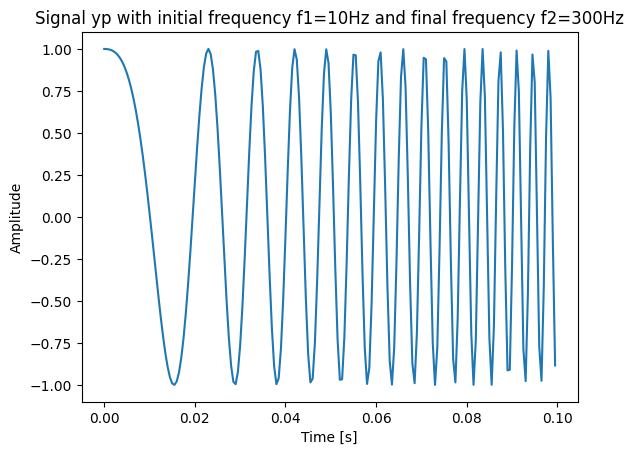

In [191]:
import matplotlib.pyplot as plt

plt.plot(t_p, yp)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')

plt.title('Signal yp with initial frequency f1=10Hz and final frequency f2=300Hz')

plt.show()

### Creating Hanning Window

The signal `yp` should be multiplied  the hanning window, so we will first define the hann_window of the same length as the length of yp signal and then multiply.

In [192]:
hann_window = np.hanning(yp.shape[0])  # Hanning window with the length of yp

yp = yp * hann_window

### Plotting `yp` after multiplied by Hanning window

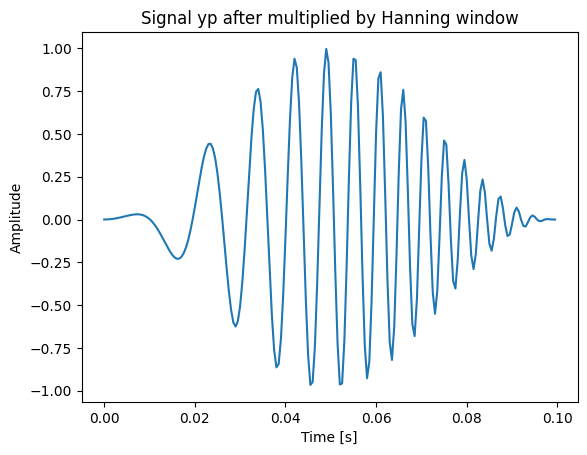

In [193]:
plt.plot(t_p, yp)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')

plt.title('Signal yp after multiplied by Hanning window')

plt.show()

### Adding `yp` signals to `y` signal starting at 500 sample 

In [194]:
y[500:500 + yp.shape[0]] = yp

### Plotting `y` signal.

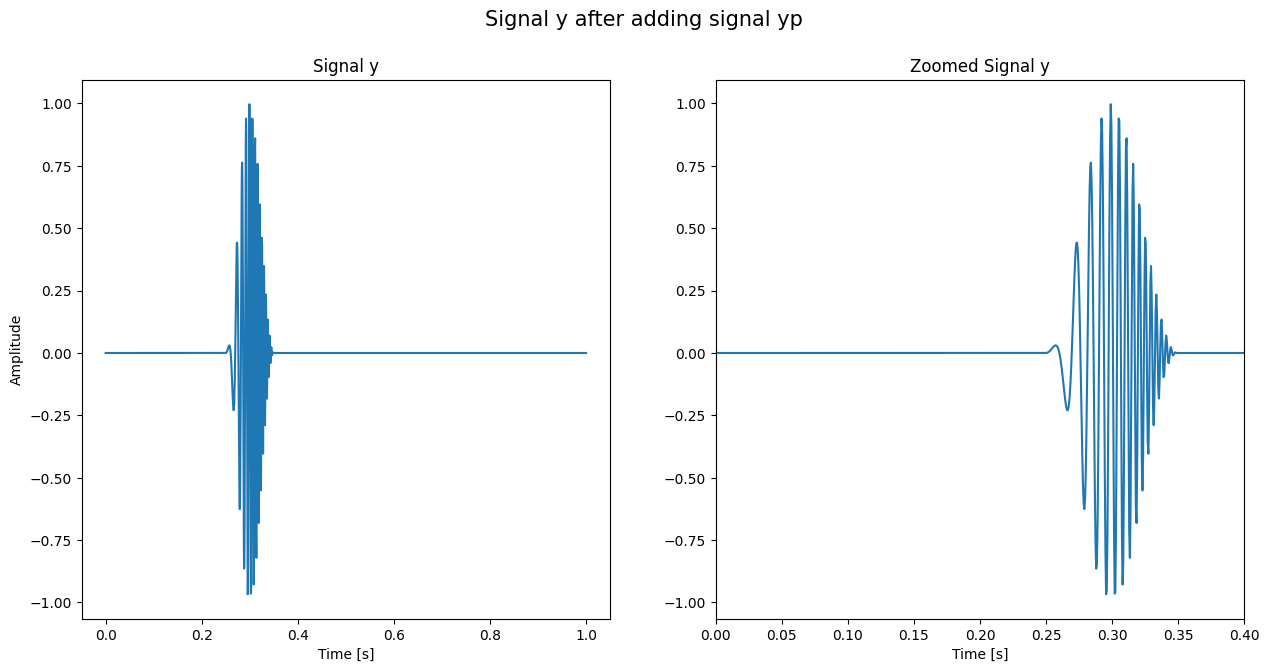

In [195]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

axes[0].plot(t, y)
axes[0].set_ylabel('Amplitude')
axes[0].set_xlabel('Time [s]')
axes[0].set_title('Signal y')

axes[1].plot(t, y)
axes[1].set_xlabel('Time [s]')
axes[1].set_xlim([0, 0.4])
axes[1].set_title('Zoomed Signal y')

fig.suptitle('Signal y after adding signal yp', fontsize=(15))

plt.show()

### Calculating the correlation between signal `y` and `yp` by using the `correlation` function.

When using the `correlate` function in signal processing, we aim to measure the **time delay** (or lag) between two signals. The correlation function computes the similarity between the signals for different time shifts, allowing us to determine at which time shift the signals are most similar (i.e., where the maximum correlation occurs).  
  
The `lags` vector represents the shifts (time delays) in samples between the two signals. 

- When performing correlation, the `lags` vector is generated to cover all possible shifts, from the maximum negative shift (where `signal_2` is fully ahead of `signal_1`) to the maximum positive shift (where `signal_2` is fully behind `signal_1`).
- The reason for the shift by `-len(signal_2)` is to account for the largest negative shift, where the beginning of `signal_2` is misaligned with `signal_1`.
  
For example, if `signal_1` has length 5 and `signal_2` has length 3, the `lags` vector will range from `-2` (the maximum negative shift) to `+4` (the maximum positive shift), resulting in 7 possible values for `lags`.

Finally, the `lags` values are converted to time using the sampling interval `dt`:
```python
tc = lags * dt

In [196]:
import numpy as np
from scipy.signal import correlate

# Correlation
yc = correlate(y, yp, mode='full')
# Normalize for the better visualization
yc = yc / np.max(yc)

# Define the time vecotor for the correlation
lags = np.arange(-yp.shape[0] + 1, y.shape[0])
tc = lags * dt

### Plotting the correlation between signal `y` and `yp`

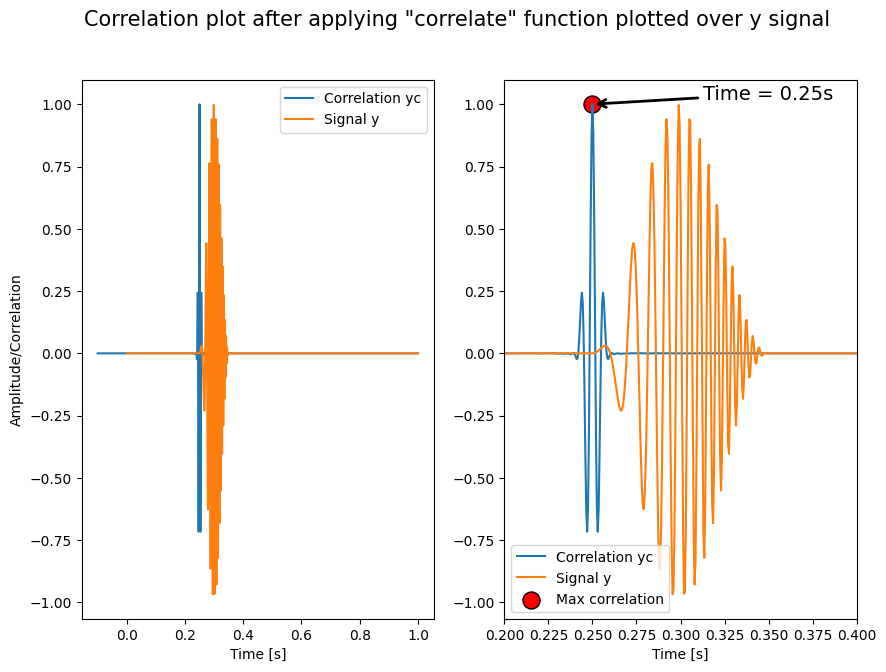

In [197]:
idx_max_corr = np.argmax(yc)
t_peak = tc[idx_max_corr]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

axes[0].plot(tc, yc, label='Correlation yc')
axes[0].plot(t, y, label='Signal y')
axes[0].set_ylabel('Amplitude/Correlation')
axes[0].set_xlabel('Time [s]')

axes[0].legend()


axes[1].plot(tc, yc, label='Correlation yc')
axes[1].plot(t, y, label='Signal y')
axes[1].set_xlabel('Time [s]')
axes[1].set_xlim([0.2, 0.4])

axes[1].scatter(t_peak, yc[idx_max_corr], color='red', s=150, edgecolors='black', label="Max correlation")
axes[1].legend()

axes[1].annotate(f'Time = {t_peak:.2f}s',
                 xy=(t_peak , yc[idx_max_corr]),  # Start point of the arrow
                 xytext=(t_peak + 0.1, yc[idx_max_corr] + 0.02),  # End point of the arrow
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                 fontsize=14,
                 ha='center')

fig.suptitle('Correlation plot after applying "correlate" function plotted over y signal', fontsize=(15))

plt.show()


### Calculating the correlation between signal `y` and `yp` using the `convolve` function.

#### Relation Between Convolution and Correlation

The operation `convolve(y, x[::-1])` is mathematically equivalent to `correlate(y, x)`. 

- **Correlation** measures how much one signal (e.g., `x`) matches another (e.g., `y`) as it is shifted over different time intervals.
- **Convolution**, on the other hand, involves flipping one signal (here `x[::-1]` represents the reversed `x`) and then sliding it over another signal (`y`).

By reversing `x` before applying convolution, the result of `convolve(y, x[::-1])` gives the same output as the cross-correlation computed by `correlate(y, x)`. 

The reason for this equivalence is that the convolution operation involves **reversing** the second signal, which is the main difference between convolution and correlation.

#### In summary:
- **`correlate(y, x)`**: Measures the alignment of `x` with `y` for different shifts.
- **`convolve(y, x[::-1])`**: Does the same, but first reverses `x`.  
  
#### Difference in the Calculation of the `lags` Vector

When using **convolution** (`convolve`), the `lags` vector is calculated differently than in **correlation** (`correlate`) due to the way the signals are shifted.  
- **For Convolution (`convolve`)**:  
  The `lags` vector represents the time shifts between the two signals after one of them has been reversed. The convolution operation only considers **non-negative shifts** after the reversal. As the second signal is slid over the first, the `lags` vector spans from **0** (no shift) to **`len(y) + len(x) - 1`** (maximum shift). The `lags` vector is computed as:

  lags = np.arange(0, len(y) + len(x) - 1)

Below is the link to visualization how the convolution works.  
https://lpsa.swarthmore.edu/Convolution/CI.html

In [198]:
from scipy.signal import convolve

# Compute correlation by using convolve func
yc = convolve(y, yp[::-1])
# Normalize for the better visualization
yc = yc / np.max(yc)

# Define the time vecotor for the correlation
lags = np.arange(0, len(y) + len(yp) - 1)
tc = lags * dt


### Plotting the correlation between signal `y` and `yp`

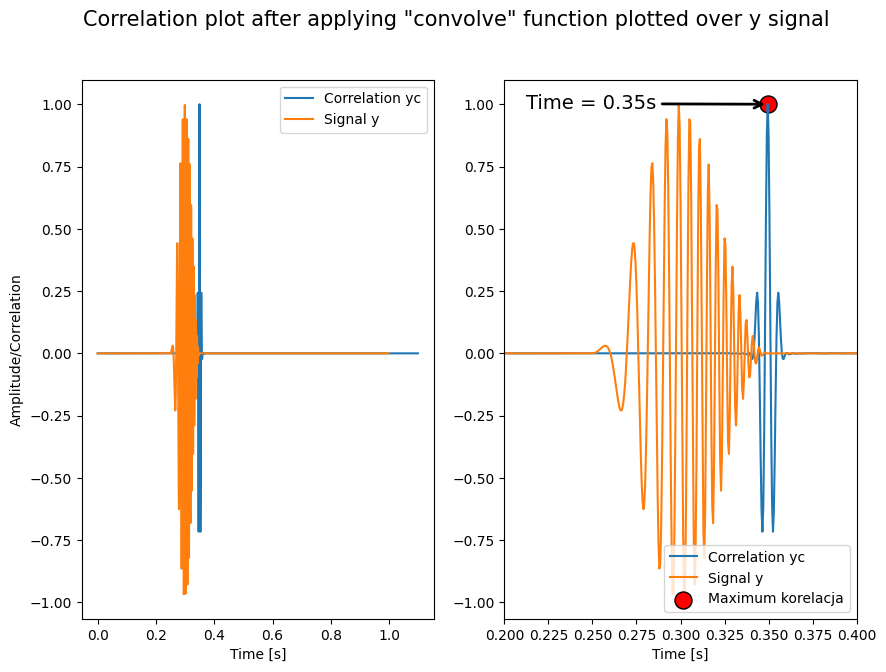

In [199]:
idx_max_corr = np.argmax(yc)
t_peak = tc[idx_max_corr]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

axes[0].plot(tc, yc, label='Correlation yc')
axes[0].plot(t, y, label='Signal y')
axes[0].set_ylabel('Amplitude/Correlation')
axes[0].set_xlabel('Time [s]')

axes[0].legend()


axes[1].plot(tc, yc, label='Correlation yc')
axes[1].plot(t, y, label='Signal y')
axes[1].set_xlabel('Time [s]')
axes[1].set_xlim([0.2, 0.4])

axes[1].scatter(t_peak, yc[idx_max_corr], color='red', s=150, edgecolors='black', label="Maximum korelacja")
axes[1].legend()

axes[1].annotate(f'Time = {t_peak:.2f}s',
                 xy=(t_peak , yc[idx_max_corr]),  # Start point of the arrow
                 xytext=(t_peak - 0.1, yc[idx_max_corr] - 0.02),  # End point of the arrow
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                 fontsize=14,
                 ha='center')

fig.suptitle('Correlation plot after applying "convolve" function plotted over y signal', fontsize=(15))

plt.show()


### Difference Between Correlation Using `correlate` and `convolve`

The results of correlation obtained using the `correlate` function and the `convolve` function are different. Specifically, the correlation plot obtained using the `correlate` function appears to the **left** of the original signal `y`, while the plot from the `convolve` function appears to the **right** of the original signal `y`. 

The standard form for convolution is:
\[
s(t) = \sum y(\tau) \cdot h(t - \tau)
\]
which means that the second signal is reversed before being shifted over the first signal. To use `convolve` for correlation, the second signal (`yp`) needs to be manually reversed (i.e., `yp[::-1]`). This reversal is the key difference between convolution and correlation.

As a result, while both methods theoretically measure the same alignment between signals, the differences in sample indexing and time-shifting conventions can cause the maximum position in the time-domain plot to appear at different locations.

### For Correlation (`correlate`):
The `lags` vector represents the time shifts between the two signals, ranging from **maximum negative shift** (when one signal is completely shifted left relative to the other) to the **maximum positive shift** (when the signals are shifted right). The `lags` vector is computed as:

lags = np.arange(-len(x) + 1, len(y))

## Task 1.2

### Creating chirp signals

`yp` as a chirp with the combinations of:
- length **200** samples initial frequency `f1 = 30 Hz` and final frequency `f2 = 100 Hz, 200 Hz, 500 Hz`.  

In [200]:
Ns_p = 200
fs_p = 2000
dt_p = 1 / fs_p
t_p = np.arange(0, Ns_p) * dt_p

f1_p = 30
f2_p = [100, 200, 500]

signals_p = []
for f2 in f2_p:
    yp = chirp(t_p, f1_p, t_p[-1], f2)
    signals_p.append(yp)

### Plotting chirp signals

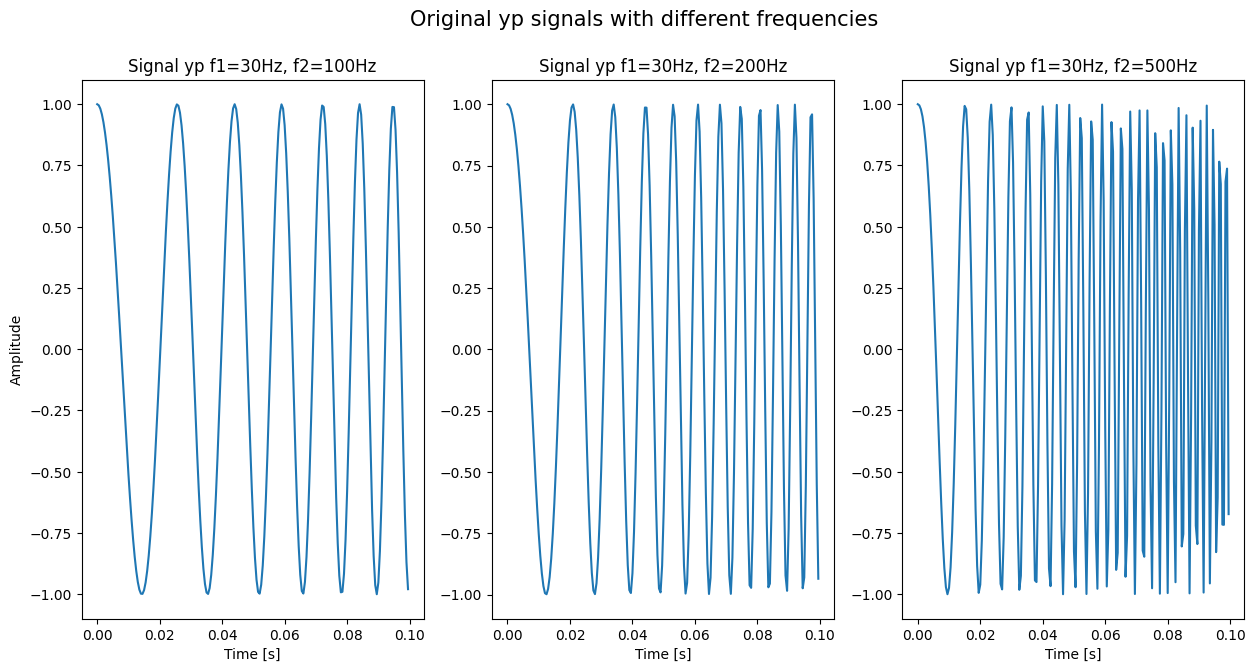

In [201]:
fig, axes = plt.subplots(nrows=1, ncols=len(signals_p), figsize=(15, 7))

for idx, yp in enumerate(signals_p):
    axes[idx].plot(t_p, yp)
    axes[idx].set_title(f'Signal yp f1=30Hz, f2={f2_p[idx]}Hz')
    axes[idx].set_xlabel('Time [s]')

axes[0].set_ylabel('Amplitude')

fig.suptitle('Original yp signals with different frequencies', fontsize=15)

plt.show()

### Multiplying chirp signals by Hanning window and adding them to `y` signal

In [202]:
# Create Hanning window
hann_window = np.hanning(signals_p[0].shape[0])

# list of signals
signals_yp = []  # Chrip signals
signals_y = []   # Y signals

for signal in signals_p:
    # Multiply yp signal by Hanning window
    yp = signal * hann_window
    signals_yp.append(yp)

    # Add the yp signal to y signal starting at 500 sample
    y = np.zeros(Ns)
    y[500:500 + signal.shape[0]] = yp
    signals_y.append(y)

### Plotting chirp signals after muplited by Hanning window

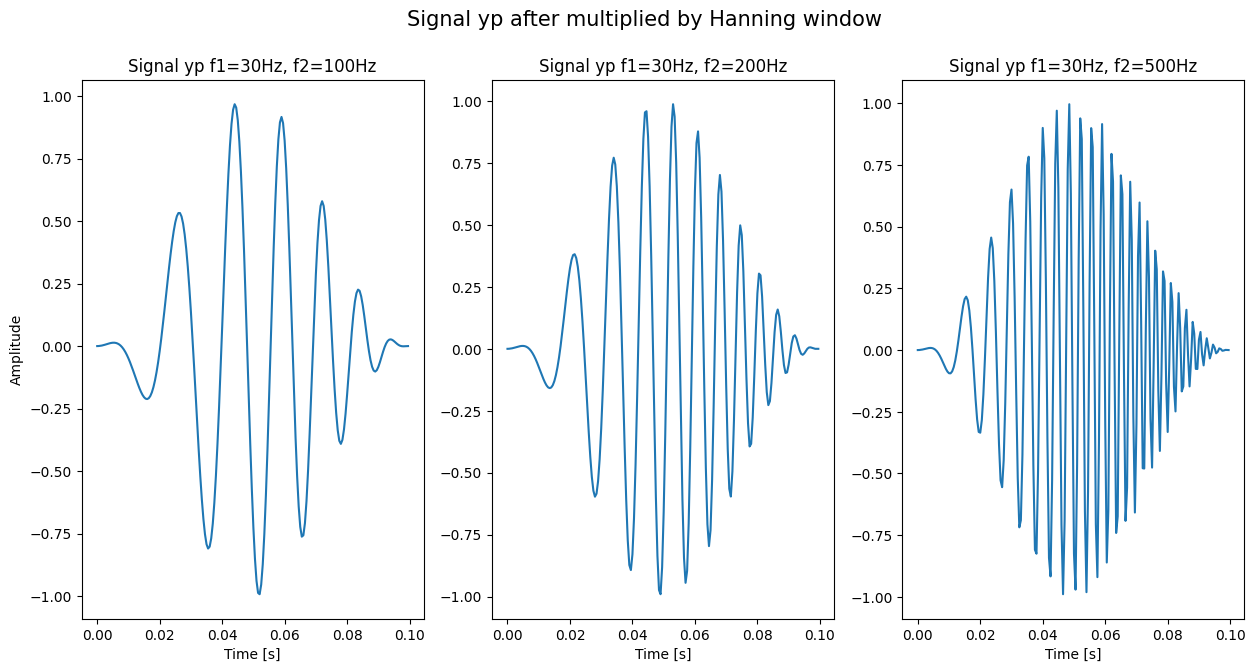

In [203]:
fig, axes = plt.subplots(nrows=1, ncols=len(signals_p), figsize=(15, 7))

for idx, yp in enumerate(signals_yp):
    axes[idx].plot(t_p, yp)
    axes[idx].set_title(f'Signal yp f1=30Hz, f2={f2_p[idx]}Hz')
    axes[idx].set_xlabel('Time [s]')

axes[0].set_ylabel('Amplitude')

fig.suptitle('Signal yp after multiplied by Hanning window', fontsize=15)

plt.show()

### Plotting `y` signal

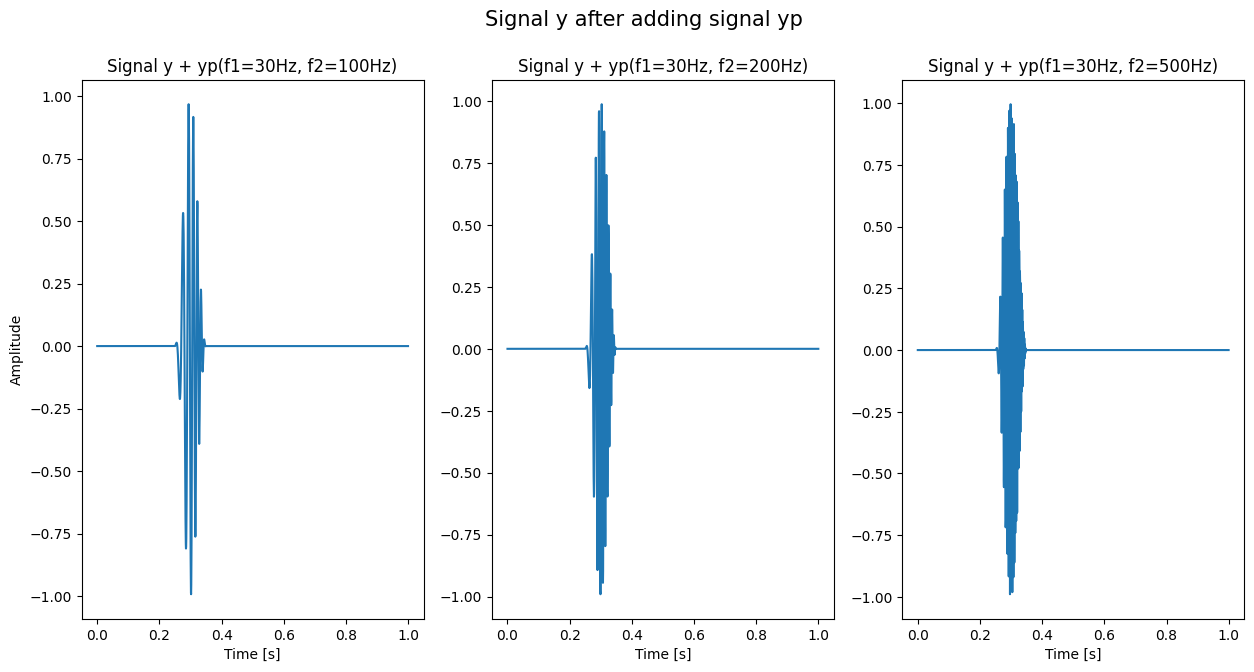

In [204]:
fig, axes = plt.subplots(nrows=1, ncols=len(signals_p), figsize=(15, 7))


for idx, y in enumerate(signals_y):
    axes[idx].plot(t, y)
    axes[idx].set_title(f'Signal y + yp(f1=30Hz, f2={f2_p[idx]}Hz)')
    axes[idx].set_xlabel('Time [s]')

axes[0].set_ylabel('Amplitude')

fig.suptitle('Signal y after adding signal yp', fontsize=15)

plt.show()

### Calculating correlations between signals `y` and signals `yp`

In [205]:
y_corrs = []
for y, yp in zip(signals_y, signals_yp):
    yc = correlate(y, yp, mode='full')
    y_corrs.append(yc)

lags = np.arange(-yp.shape[0] + 1, y.shape[0])
tc = lags * dt

### Plotting the correlation between signals `y` and `yp`

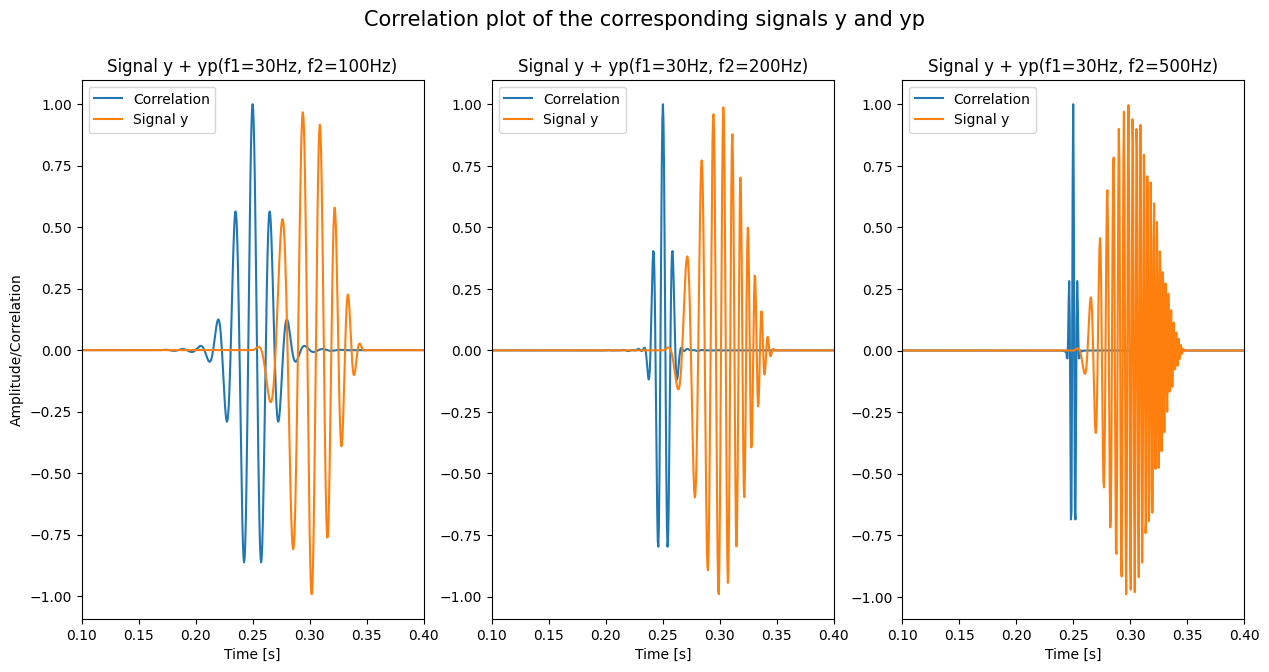

In [206]:
fig, axes = plt.subplots(nrows=1, ncols=len(y_corrs), figsize=(15, 7))

for idx, (y, y_corr) in enumerate(zip(signals_y, y_corrs)):
    y_corr = y_corr / np.max(np.abs(y_corr))
    axes[idx].plot(tc, y_corr, label='Correlation')
    axes[idx].plot(t, y, label='Signal y')
    axes[idx].set_title(f'Signal y + yp(f1=30Hz, f2={f2_p[idx]}Hz)')
    axes[idx].set_xlabel('Time [s]')
    axes[idx].set_xlim([0.1, 0.4])
    axes[idx].legend()

axes[0].set_ylabel('Amplitude/Correlation')

fig.suptitle('Correlation plot of the corresponding signals y and yp', fontsize=15)

plt.show()

The relationship between the time duration of the correlation result and the frequency range of the chrip signal is inversely proportional. The time duration of the correlation result is wide if the signal's frequency range is narrow, as shown in the chart above.


### Creating chirp signal

`yp` as a chirp:
- length **200** samples initial frequency `f1 = 500 Hz` and final frequency `f2 = 500 Hz`.

In [207]:
Ns_p = 200
fs_p = 2000
dt_p = 1 / fs_p
t_p = np.arange(0, Ns_p) * dt_p

f1_p = 500
f2_p = 500

y_p = chirp(t_p, f1_p, t_p[-1], f2)

### Plotting chirp signal

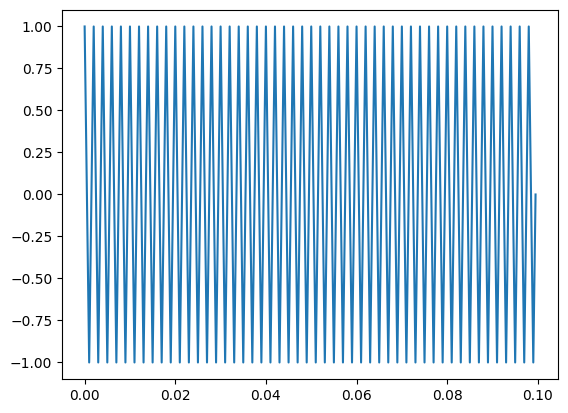

In [208]:
plt.plot(t_p, y_p)

plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title(f'yp(f1=500Hz, f2=500Hz)')

plt.show()

### Multiplying chrips signal by Hanning window

In [209]:
hann_window = np.hanning(y_p.shape[0])

y_p = y_p * hann_window

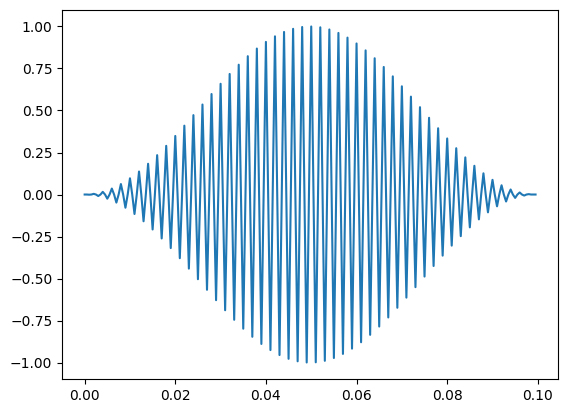

In [210]:
plt.plot(t_p, y_p)

plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title(f'yp(f1=500Hz, f2=500Hz) after multiplied by Hanning window')

plt.show()

### Adding `yp` signal to `y` signal starting at 500 sample 

In [211]:
y[500:500 + y_p.shape[0]] = y_p

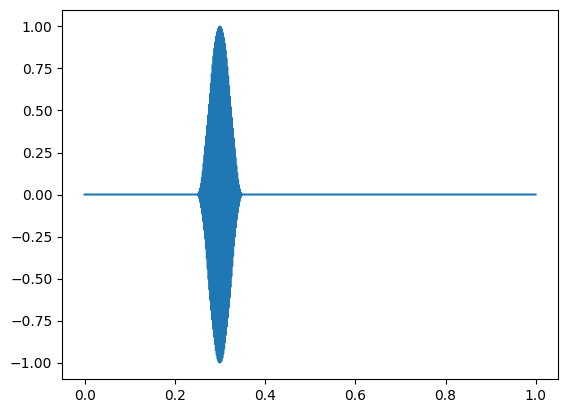

In [212]:
plt.plot(t, y)

plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title(f'Signal y + yp(f1=500Hz, f2=500Hz)')

plt.show()

### Calculating correlation between `y` and `yp` signal

In [213]:
y_c = correlate(y, y_p, mode='full')
y_c = y_c / np.max(y_c)

lags = np.arange(-y_p.shape[0] + 1, y.shape[0])
tc = lags * dt

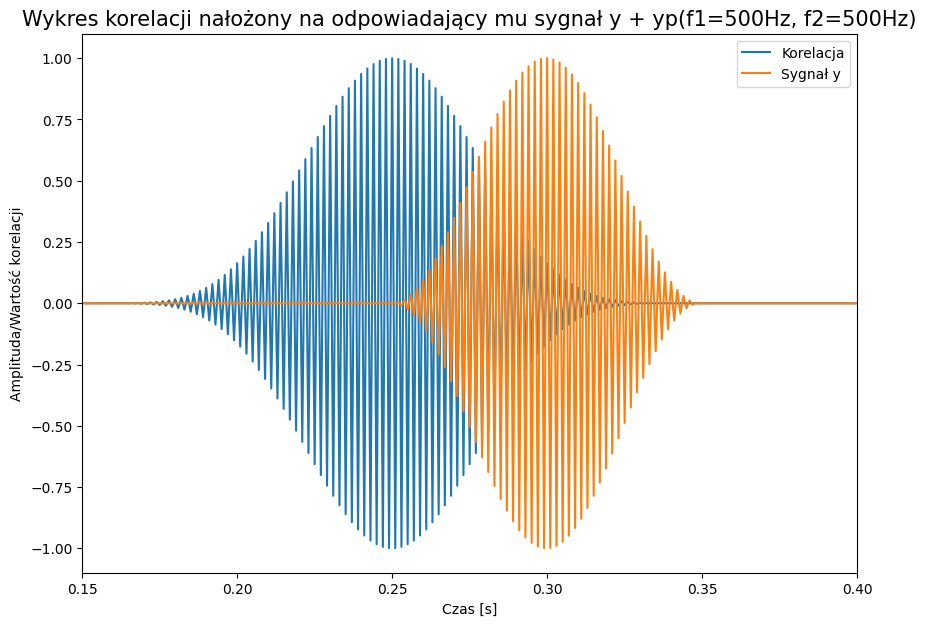

In [214]:
fig = plt.figure(figsize=(10, 7))

plt.plot(tc, y_c, label='Correlation')
plt.plot(t, y, label='Signal y')
plt.ylabel('Amplitude/Correlation')
plt.xlabel('Time [s]')
plt.xlim([0.15, 0.4])
plt.title(f'Correlation plot of the corresponding signals y and yp(f1=500Hz, f2=500Hz)', fontsize=15)
plt.legend()

plt.show()

In the case of a signal with the same starting and ending frequencies, the correlation plot resembles the original signal.


## Task 1.3

### Creating an zeros vector `y` with 2000 samples

In [215]:
import numpy as np

Ns = 2000
fs = 2000
dt = 1 / fs
t = np.arange(0, Ns) * dt

y = np.zeros(Ns)

### Creating chirp signal

`yp` as a chirp:
- length **1000** samples, frequency sampling **2000**, initial frequency `f1 = 50 Hz` and final frequency `f2 = 500 Hz`.

In [216]:
from scipy.signal import chirp

Ns_p = 1000
fs_p = 2000
f1_p = 50
f2_p = 500
dt_p = 1 / fs
t_p = np.arange(0, Ns_p) * dt_p

yp = chirp(t_p, f1_p, t_p[-1], f2_p)

### Hanning window

In [217]:
hann_window = np.hanning(Ns_p)

yp = yp * hann_window

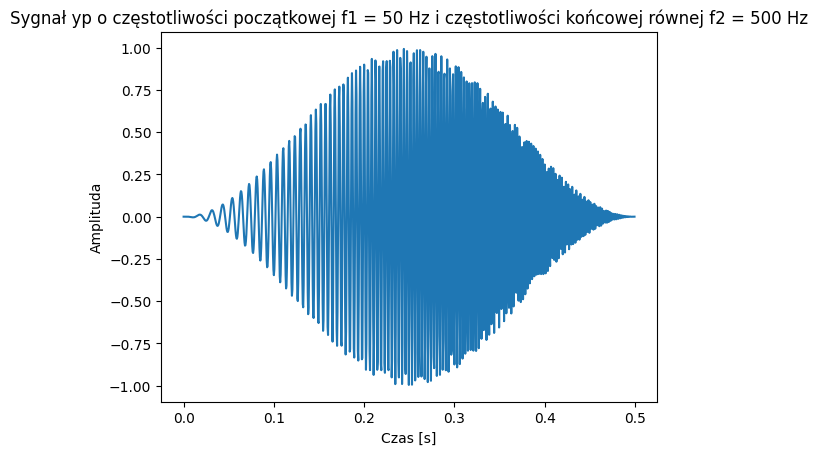

In [218]:
plt.plot(t_p, yp)
plt.ylabel('Amplituda')
plt.xlabel('Czas [s]')

plt.title('Sygnał yp o częstotliwości początkowej f1 = 50 Hz i częstotliwości końcowej równej f2 = 500 Hz')

plt.show()

###

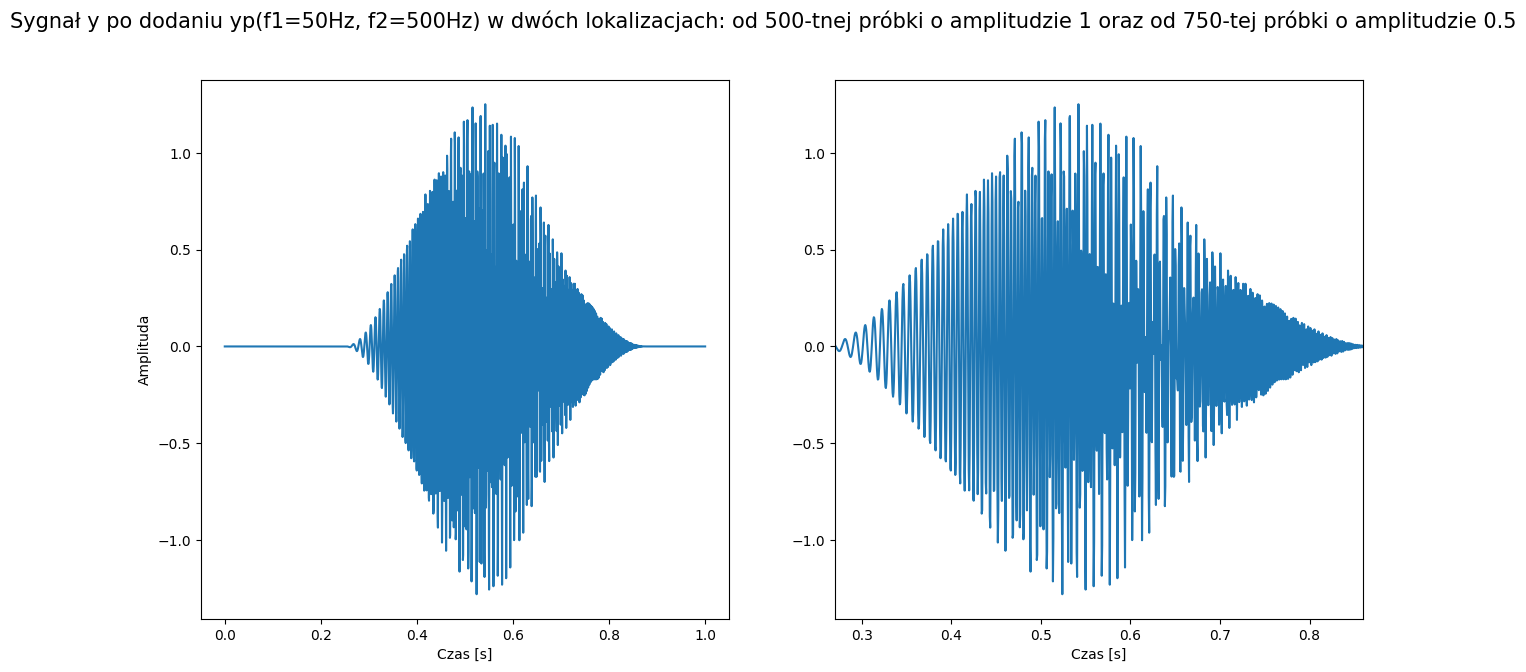

In [219]:
y[500:500 + yp.shape[0]] = y[500:500 + yp.shape[0]] + yp
y[750:750 + yp.shape[0]] = y[750:750 + yp.shape[0]] + 0.5 * yp

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

axes[0].plot(t, y)
axes[0].set_ylabel('Amplituda')
axes[0].set_xlabel('Czas [s]')

axes[1].plot(t, y)
axes[1].set_xlabel('Czas [s]')
axes[1].set_xlim([0.27, 0.86])

fig.suptitle('Sygnał y po dodaniu yp(f1=50Hz, f2=500Hz) w dwóch lokalizacjach: od 500-tnej próbki o amplitudzie 1 oraz od 750-tej próbki o amplitudzie 0.5', fontsize=15)

plt.show()

In [220]:
yc = correlate(y, yp, mode='full')
yc = yc / np.max(yc)

lags = np.arange(-yp.shape[0] + 1, y.shape[0])
tc = lags * dt

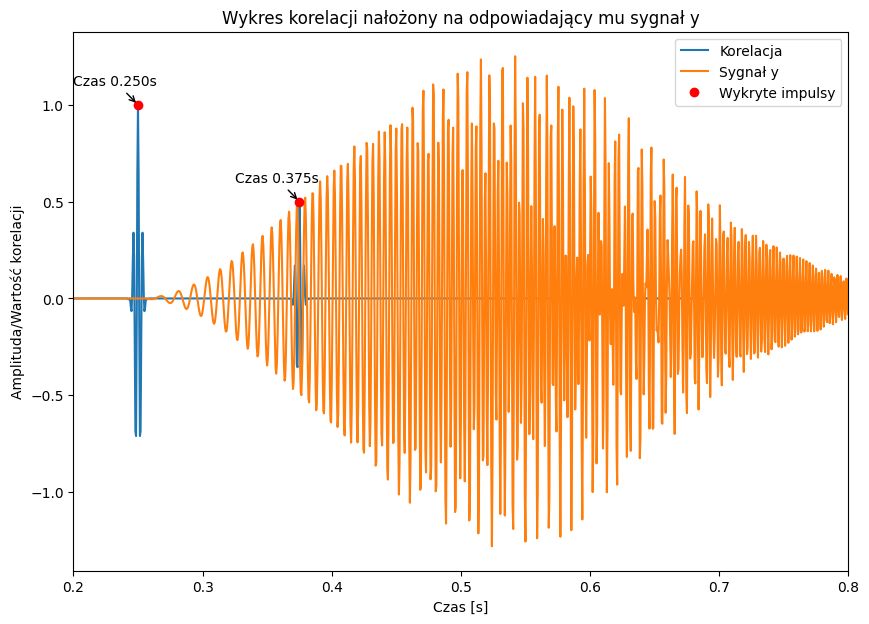

In [221]:
from scipy.signal import find_peaks

peaks, properties = find_peaks(yc, height=0.4)
impulse_positions = tc[peaks]
impulse_amplitudes = properties['peak_heights']

fig = plt.figure(figsize=(10, 7))
plt.plot(tc, yc, label='Korelacja')
plt.plot(t, y, label='Sygnał y')
plt.plot(impulse_positions, impulse_amplitudes, 'ro', label='Wykryte impulsy')
plt.ylabel('Amplituda/Wartość korelacji')
plt.xlabel('Czas [s]')
plt.xlim([0.2, 0.8])

for i in range(len(peaks)):
    plt.annotate(
        f"Czas {impulse_positions[i]:.3f}s",
        xy=(impulse_positions[i], impulse_amplitudes[i]),
        xytext=(impulse_positions[i] - 0.05, impulse_amplitudes[i] + 0.1),
        arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
        fontsize=10,
    )

plt.title("Wykres korelacji nałożony na odpowiadający mu sygnał y")
plt.legend()
plt.show()


Zad 1.4

In [222]:
std_list = [0.5, 1, 2]
noise = np.random.randn(y.shape[0])

signals_y = [(y + std * noise) for std in std_list]

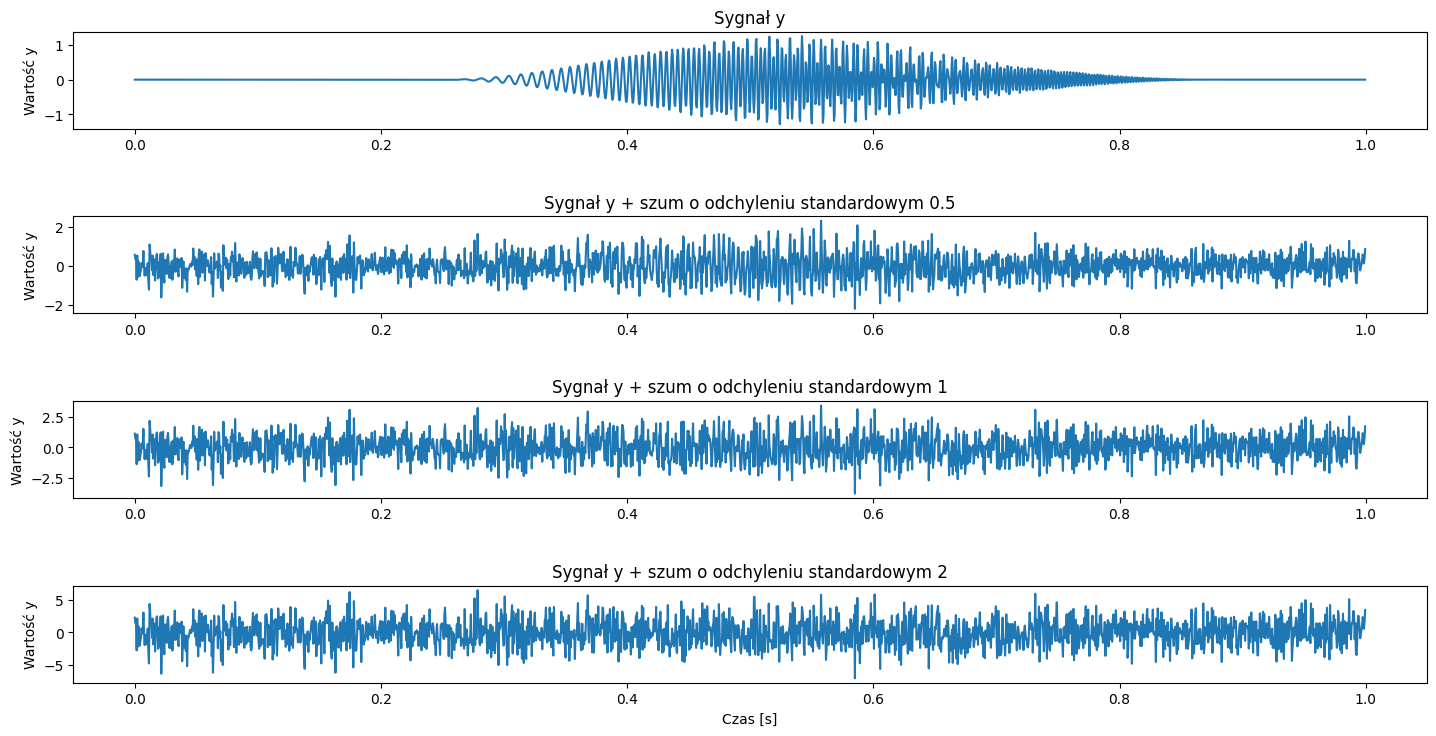

In [223]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,8))

axes[0].plot(t, y)
axes[0].set_ylabel('Wartość y')
axes[0].set_title('Sygnał y')

for idx, y in enumerate(signals_y, start=1):
    axes[idx].plot(t, y)
    axes[idx].set_ylabel('Wartość y')
    axes[idx].set_title(f'Sygnał y + szum o odchyleniu standardowym {std_list[idx-1]}')

axes[len(axes)-1].set_xlabel('Czas [s]')

fig.tight_layout(pad=3.0)
plt.show()

In [224]:
y_corrs = [correlate(y, yp, mode='full') for y in signals_y]

lags = np.arange(-yp.shape[0] + 1, signals_y[0].shape[0])
tc = lags * dt

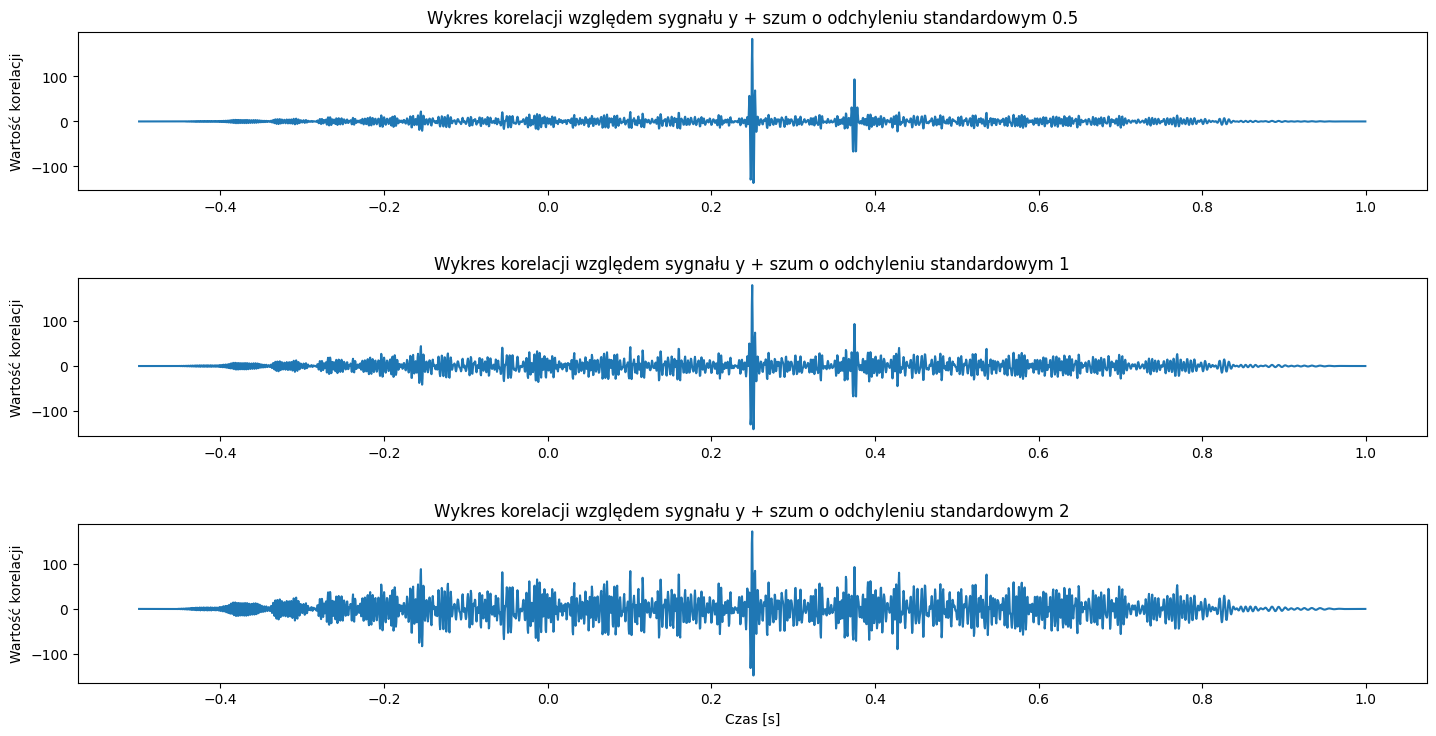

In [225]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,8))

for idx, yc in enumerate(y_corrs):
    axes[idx].plot(tc, yc)
    axes[idx].set_ylabel('Wartość korelacji')
    axes[idx].set_title(f'Wykres korelacji względem sygnału y + szum o odchyleniu standardowym {std_list[idx]}')

axes[len(axes)-1].set_xlabel('Czas [s]')

fig.tight_layout(pad=3.0)
plt.show()